# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

In [3]:
len(x_train)

87

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

We are given a dataset which is divided into x_train, x_test, y_train and y_test. x_train has 4 dimensions and y_train is single value. We have 87 rows which means we have 87 datapoints to train our linear regression model. So theoritically our model will look like y = w0 + w1*x1 +w2*x2 + w3*x3 + w4*x4 where x1,x2,x3,x4 are given points and we need to optimize weight(w0-w4). To optimize weights we will use gradient descent technique. Firstly we will add a column with value 1 to calculate bias in each x_train datapoint. tIntially we will assign value = 0 to all the weights. Now we will decide on learning rate and number of iterations. Now, we will find optimal weight for given learning rate by updating weight according to the below formula - 

                    Wnew = W - learning_rate * (dJ/dW)
                    To find dJ/dW,
                    we can write dJ/dW = (dJ/dy) * (dy/dW)
                    where dJ/dy =  d((y-wTx)^2)/dy
                                = 2 * (y-wTx)
                    and dy/dW = d(wTx)/dW
                              = x
                              
                    So now dJ/dW = 2 * x * (y-wTx)
Now we will reiterate the above formula for given number of iterations and the Wnew we get will be our optimal for given learning rate. We will use multiple learning rates and we will select the learning rate which will give us least error. Using the W we will find the value of y_pred. 

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [4]:
# model = LinearRegression()
# model.fit(x_train,y_train)
# y_pred_with_inbulit = model.predict(x_test)
# err(y_test,y_pred_with_inbulit)

In [5]:
ones = np.ones(len(x_train))
x_train_homo = np.insert(x_train, 0, ones, axis=1)
x_train_homo[0]

array([1.  , 0.  , 0.55, 0.  , 0.45])

In [6]:
# # implement Linear Regression
# x_train_homo = np.array(x_train_homo)
# y_train = np.array(y_train)
# AtransposeA = np.matmul(x_train_homo.T, x_train_homo)
# AtransposeAinverse = np.linalg.inv(AtransposeA)
# AtransposeAinverse = np.matmul(AtransposeAinverse, x_train_homo.T)
# W = np.matmul(AtransposeAinverse,y_train)
# W

In [7]:
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
def err(y_test,y_pred):
    error = 0
    for i in range(0,len(y_pred)):
        error = error + (y_test[i]-y_pred[i])**2
    error = np.sqrt(error)
    error = error/len(y_pred)
    return error

In [9]:
def linear_regression(x_train_homo, y_train, learning_rate, iterations):
    W = np.zeros(5)
    error_list = []
    W_list = []
    for lr in learning_rate:
        for i in range(iterations):
            y_dash = np.matmul(x_train_homo, W)
            W_dash = (np.matmul(x_train_homo.T, (y_dash-y_train)))
            W_dash = 2 * lr * W_dash
            W_dash = W_dash / len(x_train_homo)
            W = W - W_dash
        error_list.append(mean_squared_error(y_train, y_dash))
        W_list.append(W)
    return error_list, W_list

In [10]:
learning_rate = [0.01,0.02,0.05,0.1,0.5,0.7]
iterations = 1000
error_list, W_list = linear_regression(x_train_homo, y_train, learning_rate, iterations)

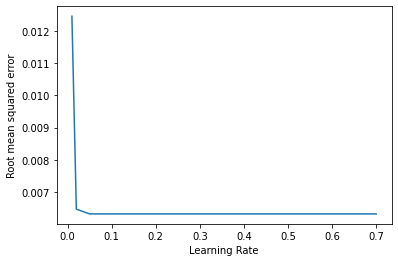

In [11]:
plt.plot(learning_rate,error_list)
plt.xlabel("Learning Rate")
plt.ylabel("Root mean squared error")
plt.show()

In [12]:
W_final = []
min_error = 99999999999999999
y_pred_final = []
for W in W_list:
    y_pred = []
    for entry in x_test:
        ans = W[0] + W[1]*entry[0] + W[2]*entry[1]  + W[3]*entry[2]  + W[4]*entry[3] 
        y_pred.append(ans)
    error = mean_squared_error(y_test, y_pred)
    print(error)
    if error<min_error:
        min_error = error 
        y_pred_final = y_pred
        W_final = W

0.005285273346637032
0.00255021238526648
0.0025379530934735773
0.0025453350655262994
0.0025453489035301056
0.0025453489035301086


In [13]:
W_final

array([ 1.6015729 , -0.01542301, -0.12278509,  1.54441783,  0.62931325])

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

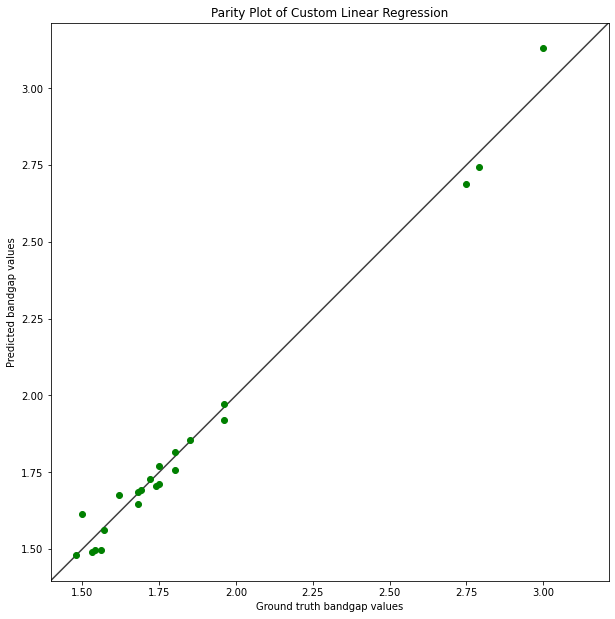

In [14]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred_final, color="green")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge Regression is a L2 norm ‘regularization’ technique that work by adding penalty equivalent to square of the magnitude of coefficients(features) along with minimizing the error between predicted and actual observations.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

Answer - The parameter alpha is used to refrain the model from getting overfitted. Value of alpha ranges from 0 to infinity. Alpha is equal to 0 means its a simple linear regression model. Basically alpha is used to emphasis the more dominant feature and de-emphasis the lesser dominant feature which improves over model accuracy. When we increase the alpha the complexity of model reduce but we need to be careful while taking the value of alpha because higher value of alpha can cause underfitting. We can avoid this by using cross-validation method.

In this case we have taken, some value of alpha ranges from 0.01 to 5. We have found out that as we increase the value of alpha the testing error increases as we can see in below alpha value Vs error plot.

In [15]:
# you should not have imported sklearn before this point
import sklearn


# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

In [16]:
def root_mean_squared_error(y_test, y_pred1):
    return np.sqrt(np.sum((y_test-y_pred1)**2))/len(y_test)

In [17]:
alpha_list = [0.01,0.05,0.1,0.2,0.4,0.6,0.8,1,2,5]
error = []
for a in alpha_list:
    model = sklearn.linear_model.Ridge(alpha = a)
    model.fit(x_train,y_train)
    y_pred_ridge = model.predict(x_test)
    error.append(root_mean_squared_error(y_test, y_pred_ridge))
df = pd.DataFrame(list(zip(alpha_list, error)), columns=['Alpha', 'Root Mean Squared Error'])
df

,Alpha,Root Mean Squared Error
0,0.01,0.010723
1,0.05,0.010627
2,0.10,0.010586
3,0.20,0.010745
4,0.40,0.011791
5,0.60,0.013402
6,0.80,0.015241
7,1.00,0.017132
8,2.00,0.025637
9,5.00,0.041292


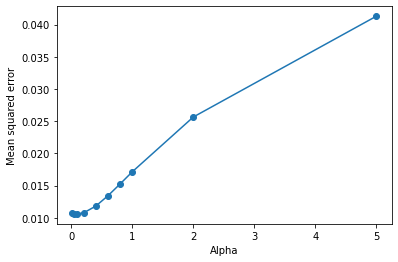

In [18]:
#Graph between alpha vs error
plt.plot(alpha_list, error,marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean squared error")
plt.show()

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso Regression is a L1 norm ‘regularization’ technique that work by adding penalty equivalent to absolute value of the magnitude of coefficients(features) along with minimizing the error between predicted and actual observations.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

The parameter alpha is used to refrain the model from getting overfitted. Value of alpha ranges from 0 to infinity. Alpha is equal to 0 means its a simple linear regression model. Basically alpha is used to emphasis the more dominant feature and de-emphasis the lesser dominant feature which improves over model accuracy. When we increase the alpha the complexity of model reduce but we need to be careful while taking the value of alpha because higher value of alpha can cause underfitting. We can avoid this by using cross-validation method.

In this case we have taken, some value of alpha ranges from 0.01 to 0.8. We have found out that as we increase the value of alpha the testing error increases as we can see in below alpha value Vs error plot. After a certain value the error becomes constant which means the model is conversed. 

In [19]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [20]:
alpha_list = [0.01,0.05,0.1,0.2,0.4,0.6,0.8]
error = []
for a in alpha_list:
    model = sklearn.linear_model.Lasso(alpha = a)
    model.fit(x_train,y_train)
    y_pred_lasso = model.predict(x_test)
    error.append(root_mean_squared_error(y_test, y_pred_lasso))
df = pd.DataFrame(list(zip(alpha_list, error)), columns=['Alpha', 'Root Mean Squared Error'])
df

,Alpha,Root Mean Squared Error
0,0.01,0.014118
1,0.05,0.054713
2,0.10,0.091597
3,0.20,0.093163
4,0.40,0.093163
5,0.60,0.093163
6,0.80,0.093163


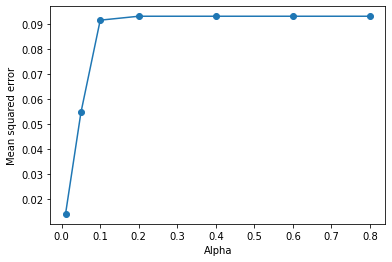

In [21]:
#Graph between alpha vs error
plt.plot(alpha_list, error,marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean squared error")
plt.show()